In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


python_df = pd.read_json(
    'python_developer_reed_jobs.json').drop_duplicates(subset=['jobId'])
software_df = pd.read_json(
    'software_developer_reed_jobs.json').drop_duplicates(subset=['jobId'])
reed_df = pd.concat([python_df, software_df]).drop_duplicates(subset=['jobId'])
reed_df['latitude']=pd.NA
reed_df['longitude']=pd.NA
print(f"python developer jobs: {python_df.shape[0]}")
print(f"software developer jobs: {software_df.shape[0]}")
print(f"entire df jobs: {reed_df.shape[0]}")

python developer jobs: 32195
software developer jobs: 17303
entire df jobs: 33956


In [42]:
technologies = ['Python', 'Django', 'Flask', 'FastAPI', 'Pyramid', 'SQL',
       'PostgreSQL', 'MySQL', 'MongoDB', 'JavaScript', 'HTML5', 'CSS3',
       'REST APIs', 'GraphQL', 'AWS', 'Azure', 'Docker', 'Kubernetes',
       ' Git ', 'CI/CD', 'PyCharm', 'Jupyter', 'NumPy', 'Pandas',
       'TensorFlow', 'Keras', 'Scikit-learn', 'Artificial Intelligence',' data ','pipeline'
       ' AI ', 'Machine Learning', 'Deep Learning', 'Neural Networks',
       'Natural Language Processing', 'NLP', 'Computer Vision',
       'Data Science', 'Predictive Analytics', 'Algorithm Development',
       'Automation', 'Robotics', 'Cognitive Computing', 'Big Data',
       'Data Mining', 'PyTorch', 'Reinforcement Learning',
       'Supervised Learning', 'Unsupervised Learning', 'AI Ethics',
       'AI Research', 'Model Training', 'Model Deployment',
       'AI Frameworks', 'AI Tools', 'AI Solutions', 'HTML', 'CSS',
       'React', 'Responsive Design', 'UI/UX Design', ' UI ', 'Adobe XD',
       'Figma', 'Sketch', 'Wireframing', 'Prototyping', 'User Research',
       'Visual Design', 'Typography', 'Color Theory', 'SEO',
       'Accessibility', 'Angular', 'Vue.js', 'Sass', 'Webpack', 'Babel',
       'TypeScript', 'Redux', 'Bootstrap', 'Tailwind CSS',
       'Cross-Browser Compatibility', 'Node.js', 'Express.js', 'Java ',
       'Spring Boot', 'Ruby on Rails', 'PHP', 'Laravel', 'C#', '.NET',
       'RESTful APIs',' REST ',' API ',' APIs ', 'Authentication', 'Authorization', 'Microservices',
       'Cyber Security Analyst','Cyber Security', 'Information Security Specialist',
       'Network Security Engineer', 'Penetration Tester',
       'Security Consultant', 'Security Operations Center (SOC) Analyst',
       'Incident Response Specialist', 'Cyber Threat Analyst',
       'Security Architect', 'Vulnerability Assessor',
       'Risk Management Specialist', 'Security Compliance Analyst',
       'Ethical Hacker', 'Digital Forensics Investigator',
       'Cloud Security Engineer', 'Application Security Engineer',
       'Identity and Access Management (IAM) Specialist',
       'Security Software Developer',
       'Chief Information Security Officer (CISO)',
       'Security Awareness Trainer', 'Cyber','backend','frontend']


<Axes: title={'center': 'Most popular keywords in job descriptions'}>

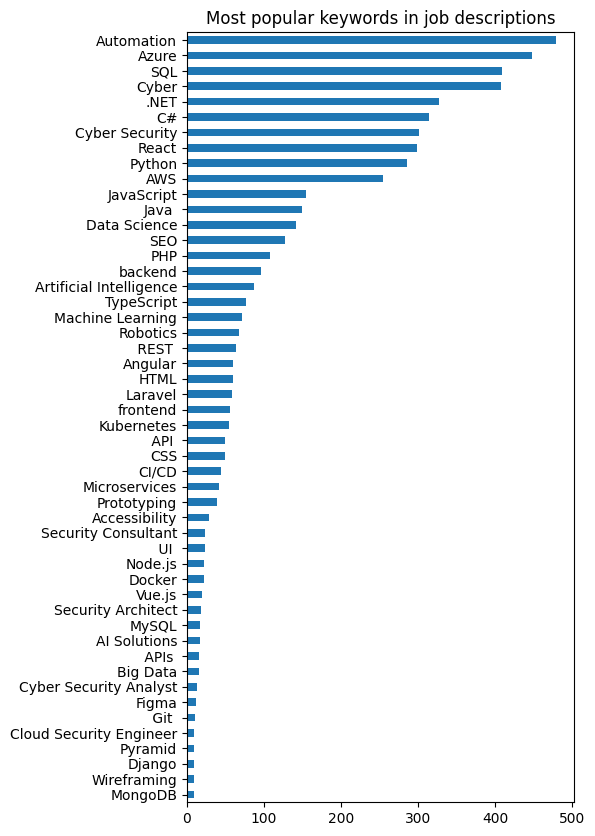

In [43]:
frecuency_tech_words = {}
for word in technologies:
    num_true = reed_df['jobDescription'].apply(
        lambda df: True if word.lower() in df.lower() else False).value_counts().get(True, 0)
    frecuency_tech_words[word] = num_true
pd.Series(frecuency_tech_words).sort_values(ascending=False)[50:0:-1].plot(
    kind='barh', figsize=(5, 10),title="Most popular keywords in job descriptions")


<Axes: title={'center': "Most popular keywords in job descriptions along with 'python'"}>

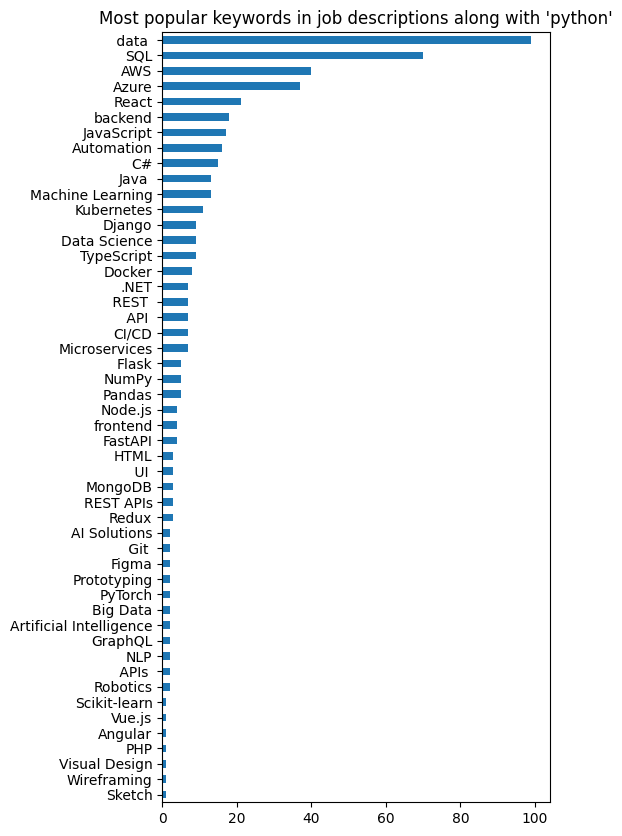

In [44]:
frecuency_tech_words = {}
for word in technologies:
    num_true = reed_df['jobDescription'].apply(
        lambda df: True if (word.lower() in df.lower() and 'python' in df.lower()) else False).value_counts().get(True, 0)
    frecuency_tech_words[word] = num_true
pd.Series(frecuency_tech_words).sort_values(ascending=False)[50:0:-1].plot(
    kind='barh', figsize=(5, 10),title="Most popular keywords in job descriptions along with 'python'")

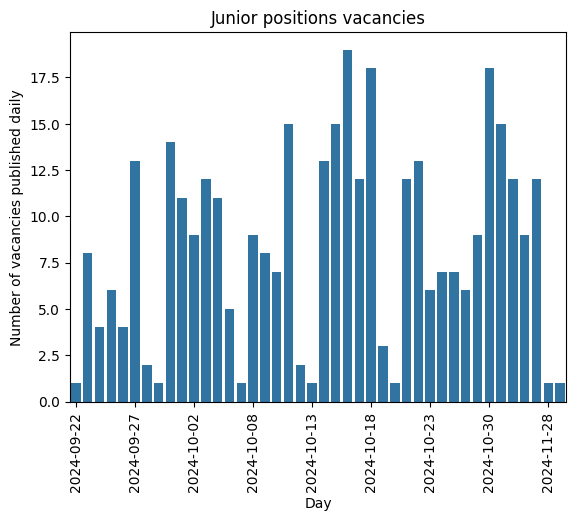

In [45]:
juniors=(
    reed_df[reed_df['jobTitle']
            .apply(lambda df: True if ('junior' or 'entry' or 'graduate') in df.lower() else False)]
    ['expirationDate']
    .value_counts()
)
juniors.index=pd.to_datetime(juniors.index,format="%d/%m/%Y")
sns.barplot(data=juniors.sort_index())
plt.xticks(range(0,len(juniors),5),rotation=90)
plt.title("Junior positions vacancies")
plt.ylabel("Number of vacancies published daily")
plt.xlabel("Day")
plt.show()


In [46]:
def plot_salary_dist(df,salary,y_median_pos,title):
    data=df[(df[salary].notna()) & (df[salary]>10000)]
    sns.displot(data=data,x=salary)
    plt.xticks(range(0,150000,10000),rotation=90)
    plt.xlim(0,150000)
    plt.axvline(x=data[salary].median(),color='r',linestyle='--')
    plt.text(x=1.1*data[salary].median(),y=y_median_pos,s=f"median={data[salary].median()}",color='r')
    plt.title(title)
    plt.show()

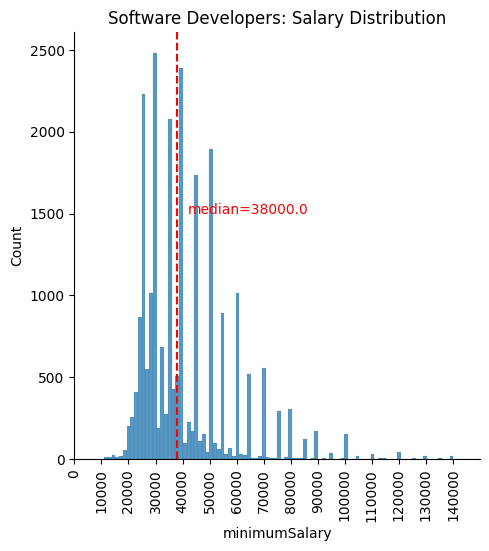

In [47]:
plot_salary_dist(reed_df,'minimumSalary',1500,title="Software Developers: Salary Distribution")

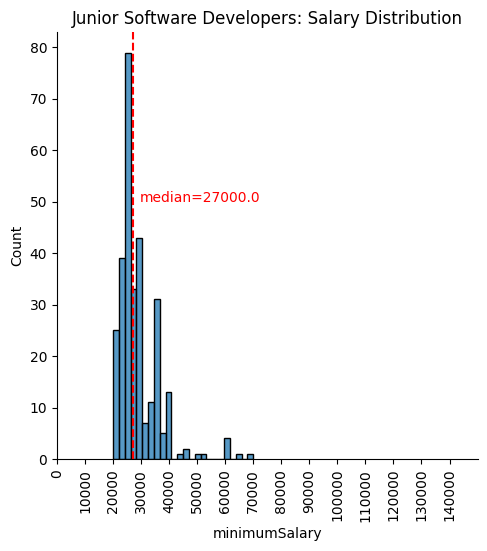

In [48]:
plot_salary_dist(
    (reed_df[reed_df['jobTitle']
    .apply(lambda df: True if ('junior' or 'entry' or 'graduate') in df.lower() else False)])
    ,"minimumSalary"
    ,50
    ,title="Junior Software Developers: Salary Distribution"
)

In [49]:
civil_df=pd.read_json('civil_engineer_reed_jobs.json').drop_duplicates(subset=['jobId'])
intersection=pd.merge(civil_df,reed_df['jobId'],on='jobId')['jobId']
civil_df=civil_df[~civil_df['jobId'].isin(intersection)]

<Axes: ylabel='jobTitle'>

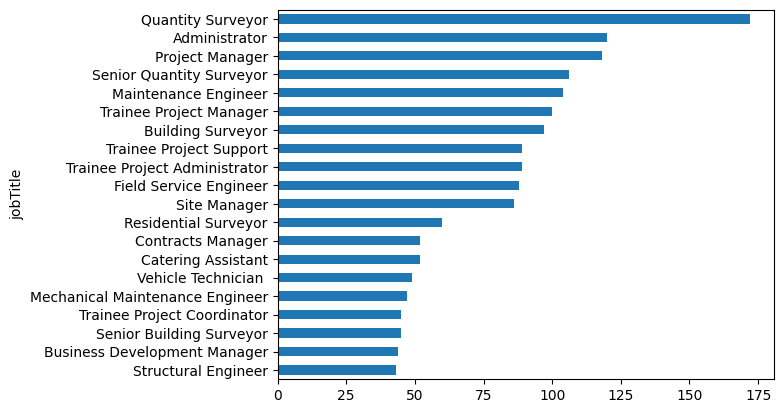

In [50]:
civil_df['jobTitle'].value_counts().head(20)[::-1].plot(kind='barh')

<Axes: ylabel='jobTitle'>

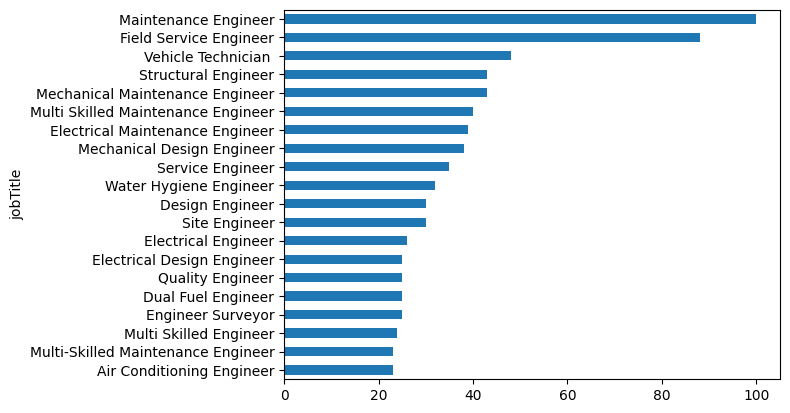

In [51]:
civil_df[civil_df['jobDescription'].apply(lambda df: ('engineer') in df.lower())]['jobTitle'].value_counts().head(20)[::-1].plot(kind='barh')

<Axes: ylabel='jobTitle'>

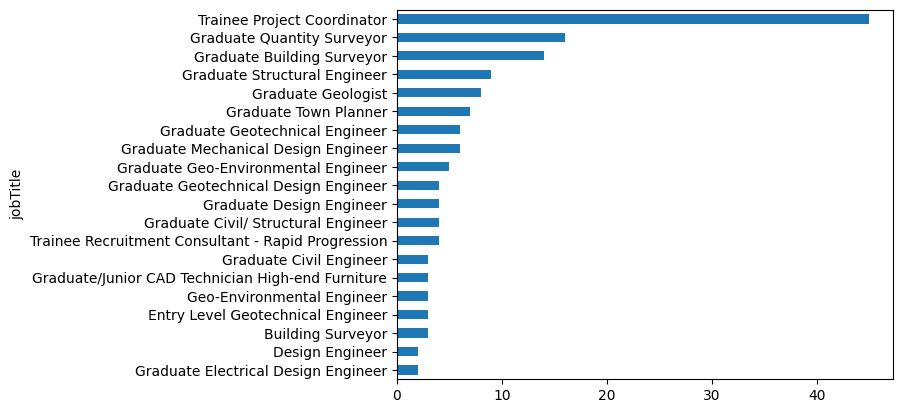

In [52]:
civil_df[civil_df['jobDescription'].apply(lambda df: ('graduate' or 'junior' or 'entry') in df.lower())]['jobTitle'].value_counts().head(20)[::-1].plot(kind='barh')

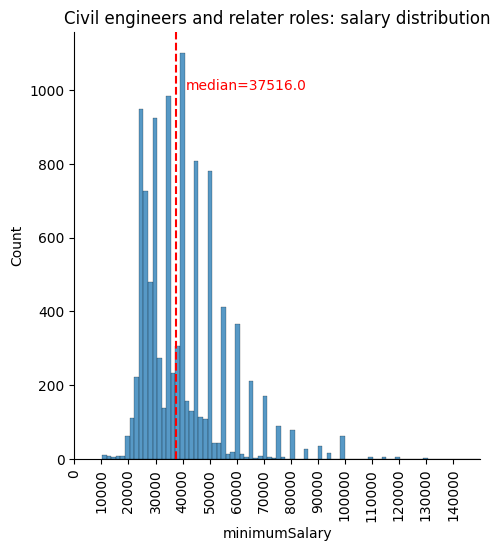

In [53]:
plot_salary_dist(
    civil_df
    ,"minimumSalary"
    ,1000
    ,title="Civil engineers and relater roles: salary distribution"
)

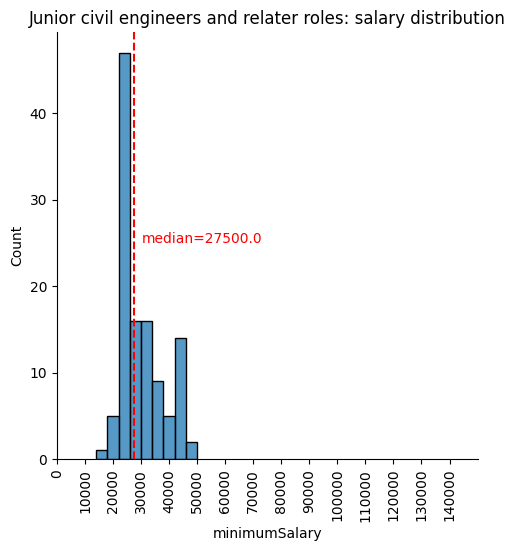

In [54]:
plot_salary_dist(
    (civil_df[civil_df['jobTitle']
    .apply(lambda df: True if ('junior' or 'entry' or 'graduate') in df.lower() else False)])
    ,"minimumSalary"
    ,25
    ,title="Junior civil engineers and relater roles: salary distribution"
)

In [55]:
# from geopy.geocoders import Nominatim

# app=Nominatim(user_agent='jobs')
# for location in reed_df['locationName'].unique():
#     if reed_df.loc[reed_df['locationName']==location,'latitude'].isna().any():
#         try:
#             latitude,longitude=app.geocode(location)[-1]
#             print(location,latitude,longitude)
#             reed_df.loc[reed_df['locationName']==location,'latitude']=latitude
#             reed_df.loc[reed_df['locationName']==location,'longitude']=longitude
#         except:
#             continue
# reed_df


In [56]:
location_df=pd.read_csv('locations_software_developer.csv')
reed_df['latitude']=location_df['latitude']
reed_df['longitude']=location_df['longitude']

In [62]:
fig=px.scatter_map(data_frame=reed_df,lat='latitude',lon='longitude',zoom=3)
fig.update_traces(cluster=dict(enabled=True))
fig.show(renderer='notebook')

<Axes: ylabel='locationName'>

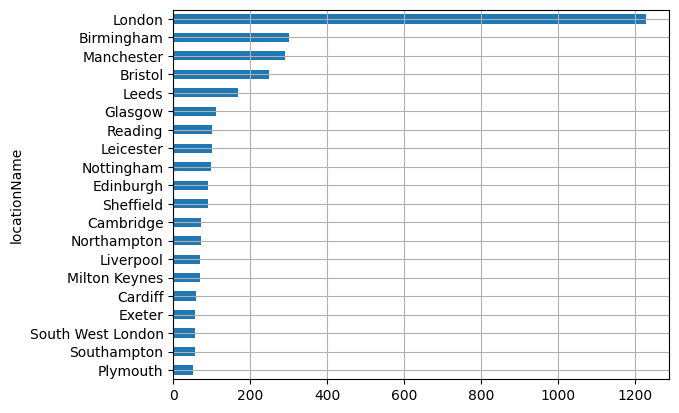

In [58]:
civil_df['locationName'].value_counts().head(20)[::-1].plot(kind='barh',grid=True)

<Axes: ylabel='employerName'>

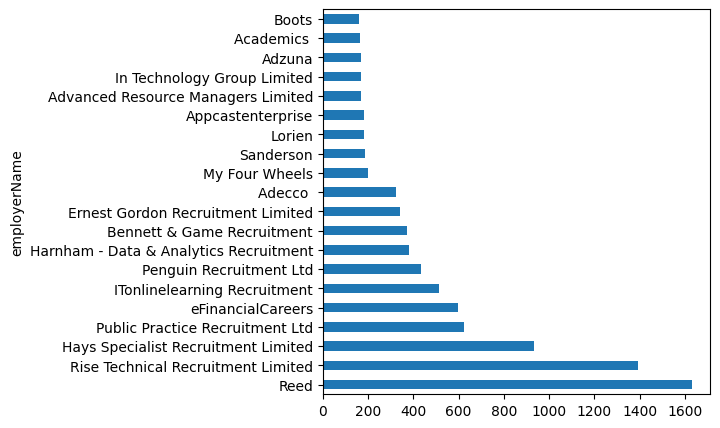

In [59]:
reed_df['employerName'].value_counts().head(20).plot(kind='barh',figsize=(5,5))